In [29]:
import sys
print(sys.executable)

/root/week_2/venv/bin/python


In [30]:
import pandas as pd 

In [31]:
from datasets import load_dataset

ds = load_dataset("microsoft/ms_marco", "v1.1")

In [32]:
type(ds)

datasets.dataset_dict.DatasetDict

In [33]:
# Get the train split
train_ds = ds["train"]

# Convert to pandas DataFrame
df = train_ds.to_pandas()


In [34]:
df.shape

(82326, 6)

In [35]:

#df["passages"][2]

In [36]:
rows = [] #Initializes an empty list called rows

for i,row in df.iterrows(): # iterate over each row in a DataFrame as (index, row) pairs:
    query = row["query"]
    query_id = row["query_id"]
    answer = row["answers"]
    query_type = row["query_type"]

    passages = row["passages"]

    for is_sel, text, url in zip(passages["is_selected"], passages["passage_text"], passages["url"]):  # zip(...) pairs them together by index
        rows.append({
            "query": query,
            "query_id": query_id,
            "query_type": query_type,
            "answer": answer,
            "passage_text": text,
            "url": url,
            "is_selected": is_sel
        })



In [37]:
full_df = pd.DataFrame(rows)


In [38]:
full_df.head()

,query,query_id,query_type,answer,passage_text,url,is_selected
0,what is rba,19699,description,[Results-Based Accountability is a disciplined...,"Since 2007, the RBA's outstanding reputation h...",https://en.wikipedia.org/wiki/Reserve_Bank_of_...,0
1,what is rba,19699,description,[Results-Based Accountability is a disciplined...,The Reserve Bank of Australia (RBA) came into ...,https://en.wikipedia.org/wiki/Reserve_Bank_of_...,0
2,what is rba,19699,description,[Results-Based Accountability is a disciplined...,RBA Recognized with the 2014 Microsoft US Regi...,http://acronyms.thefreedictionary.com/RBA,0
3,what is rba,19699,description,[Results-Based Accountability is a disciplined...,The inner workings of a rebuildable atomizer a...,https://www.slimvapepen.com/rebuildable-atomiz...,0
4,what is rba,19699,description,[Results-Based Accountability is a disciplined...,Results-Based Accountability® (also known as R...,http://rba-africa.com/about/what-is-rba/,0


In [39]:
full_df["is_selected"].value_counts(normalize=True)


is_selected
0    0.869086
1    0.130914
Name: proportion, dtype: float64

## domain names

In [40]:
full_df["domain"] = full_df["url"].str.replace("https://", "", regex=False)\
                         .str.replace("http://", "", regex=False)\
                         .str.replace("www.", "", regex=False)\
                         .str.split("/").str[0]


In [41]:
full_df["domain"].head(10)

0                  en.wikipedia.org
1                  en.wikipedia.org
2    acronyms.thefreedictionary.com
3                   slimvapepen.com
4                    rba-africa.com
5             resultsleadership.org
6                    rba-africa.com
7     searchsecurity.techtarget.com
8                   slimvapepen.com
9                 rbaconsulting.com
Name: domain, dtype: object

In [42]:

domain_stats = full_df.groupby(["domain", "is_selected"]).size().unstack(fill_value=0)
domain_stats.columns = ["negative", "positive"]


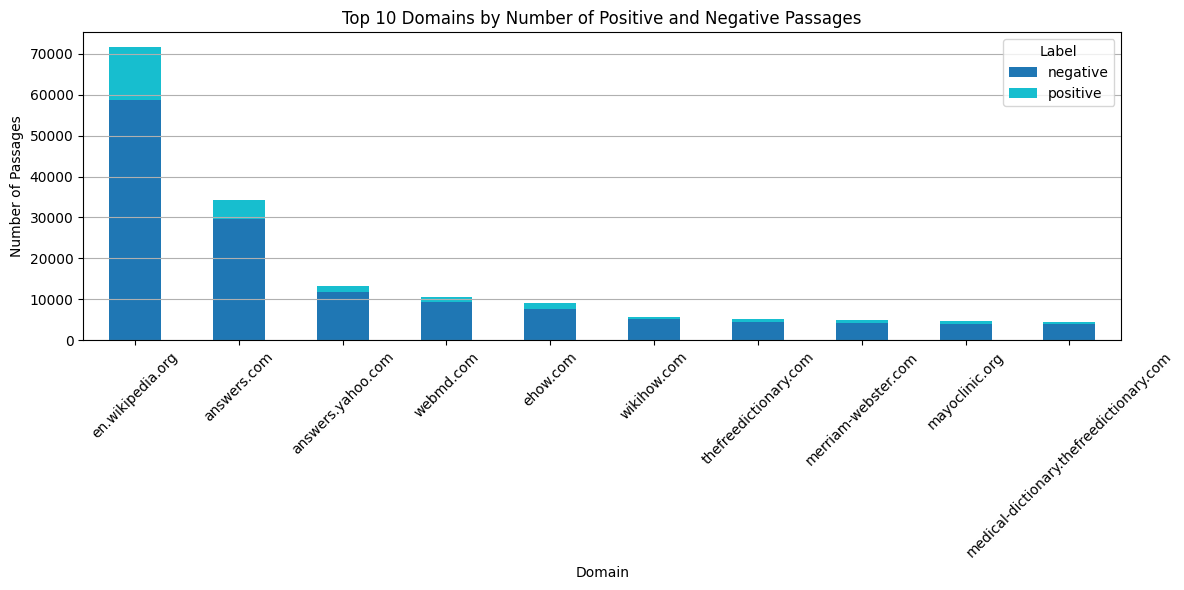

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# --- Step 3: Add total and sort ---
domain_stats["total"] = domain_stats["negative"] + domain_stats["positive"]
top_domains = domain_stats.sort_values("total", ascending=False).head(10)

# --- Step 4: Plot ---
ax = top_domains[["negative", "positive"]].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10'
)
ax.set_title("Top 10 Domains by Number of Positive and Negative Passages")
ax.set_xlabel("Domain")
ax.set_ylabel("Number of Passages")
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y')

legend = ax.legend()
legend.set_title("Label")

plt.tight_layout()
plt.show()


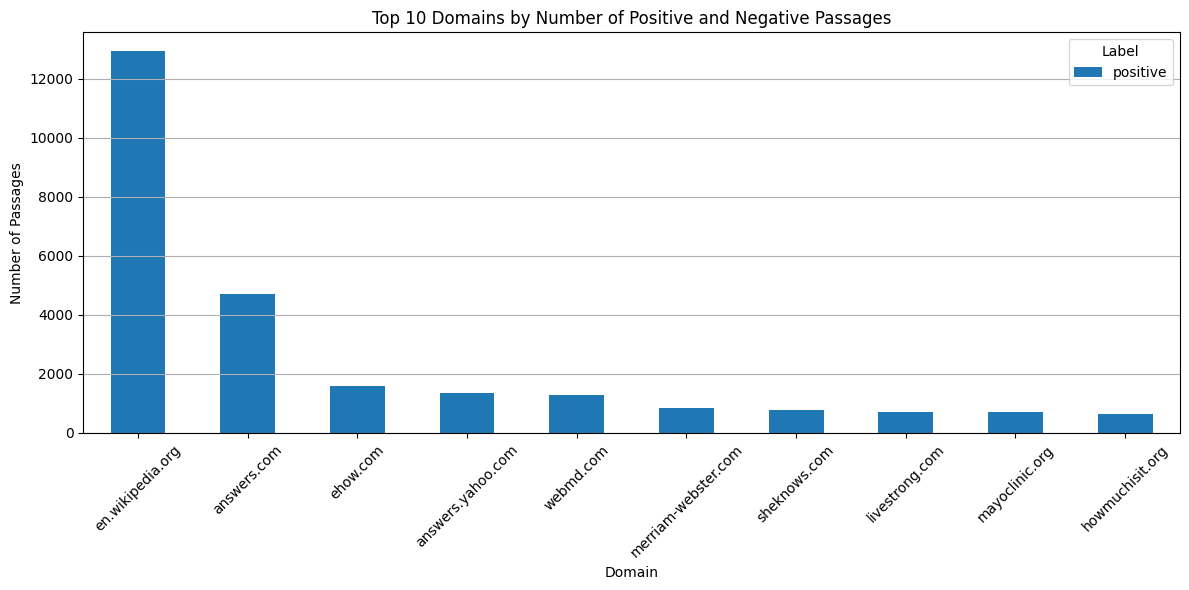

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


top_domains = domain_stats.sort_values("positive", ascending=False).head(10)

# --- Step 4: Plot ---
ax = top_domains[["positive"]].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10'
)
ax.set_title("Top 10 Domains by Number of Positive and Negative Passages")
ax.set_xlabel("Domain")
ax.set_ylabel("Number of Passages")
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y')

legend = ax.legend()
legend.set_title("Label")

plt.tight_layout()
plt.show()


In [46]:
true_positives_by_domain = full_df[full_df["is_selected"] == 1].groupby("domain").size().sort_values(ascending=False)


In [48]:
true_positives_by_domain.shape

(20687,)

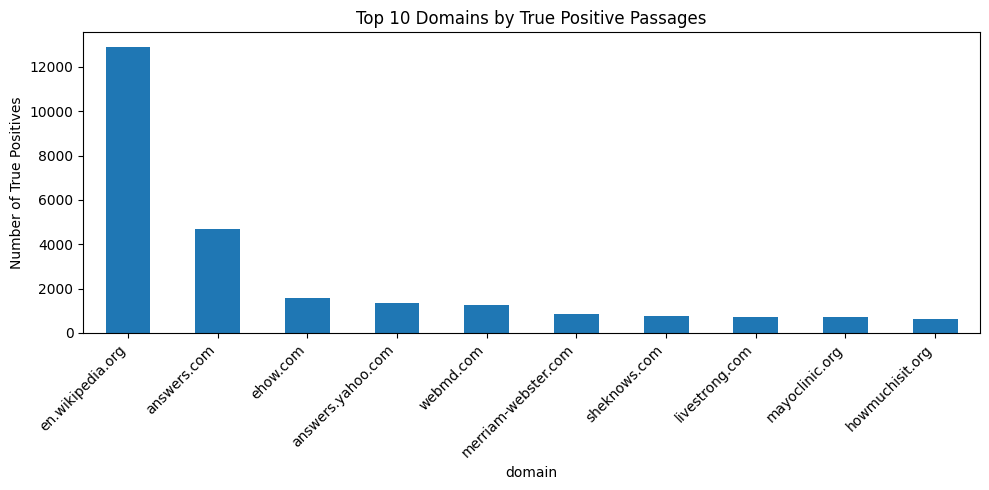

In [47]:
true_positives_by_domain.head(10).plot(
    kind="bar",
    x="domain",
    y="true_positives",
    legend=False,
    figsize=(10, 5),
    title="Top 10 Domains by True Positive Passages"
)
plt.ylabel("Number of True Positives")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
